# DAT405 Assignment 1 - Group 2

### Francisco Boudagh
### Jakob Engström

### March 24, 2023


------------------

In [1]:
import pandas as pd
import seaborn as sns
import numpy as py
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

## Problem a)

In [2]:
# Upload data
life_exp = pd.read_csv('life-expectancy.csv')
GDPp_2015 = pd.read_csv('GDP-2015.csv')

# Life expectancy from year 2015 only
life_exp_2015 = life_exp.loc[(life_exp['Year'] == 2015) & (life_exp['Code'].str.len() == 3)]

# Merging 'life expectancy from 2015' and 'GDP' data on 'Code' column
common = pd.merge(life_exp_2015, GDPp_2015, on='Code')

Data is cleaned by only selecting the countries. In other words, we have removed continents and other that are not a country. This is done by selecting only rows that have three characters in the Code column since it is only countries that have a Code character length of 3.

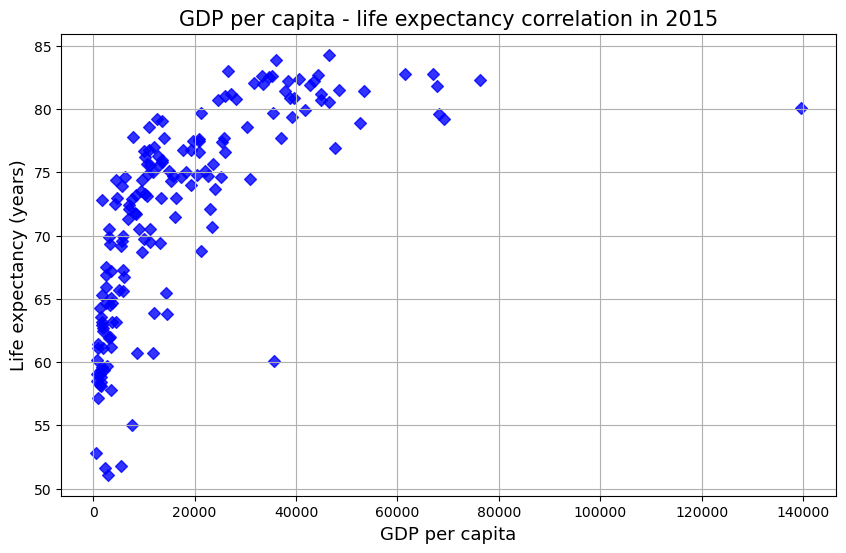

In [3]:
# Plotting
plt.figure(figsize=(10,6))
plt.scatter(x=common['GDP per capita'], y=common['Life expectancy (years)'], c='blue', alpha=0.8, marker='D')

plt.xlabel('GDP per capita', fontsize=13)
plt.ylabel('Life expectancy (years)', fontsize=13)
plt.title('GDP per capita - life expectancy correlation in 2015', fontsize=15)

plt.grid(True)
plt.show()

## Problem b)

In [4]:
le_mean = py.mean(common['Life expectancy (years)']) # Life expectancy mean
le_std = py.std(common['Life expectancy (years)']) # Life expectancy one standard deviation
age_above_mean_plus_std = le_mean + le_std 

display(Markdown(f"The global mean life expectancy is **{le_mean:.1f}** years \
    with the standard deviation **{le_std:.1f}** years."))
display(Markdown(f"Age that is one standard deviation above the mean is **{age_above_mean_plus_std:.1f}** years."))

The global mean life expectancy is **71.8** years     with the standard deviation **8.1** years.

Age that is one standard deviation above the mean is **79.9** years.

In [5]:
#Extracting: life expectancy > mean + 1std
table_highLe = life_exp_2015.loc[life_exp_2015['Life expectancy (years)'] > age_above_mean_plus_std]

table_title = "Countries with life expectancy higher than one SD above the mean"
display(Markdown(f"### {table_title}"))
display(table_highLe)

### Countries with life expectancy higher than one SD above the mean

,Entity,Code,Year,Life expectancy (years)
508,Andorra,AND,2015,83.0
1136,Australia,AUS,2015,82.7
1218,Austria,AUT,2015,81.2
1832,Belgium,BEL,2015,80.9
2048,Bermuda,BMU,2015,80.9
3118,Canada,CAN,2015,81.9
4321,Cyprus,CYP,2015,81.0
4658,Denmark,DNK,2015,80.7
5935,Finland,FIN,2015,81.4
6141,France,FRA,2015,82.2


## Problem c)

In [6]:
# Upload data
GDP = pd.read_csv('gross-domestic-product.csv')

# GDP from year 2015 and CODE length = 3
GDP_2015 = GDP.loc[(GDP['Year'] == 2015) & (GDP['Code'].str.len() == 3)]

Now, we are looking into GDP instead of GDP per capita.

Since the data is very skewed, we decided to use quartiles to define "high" and "low" instead of standard deviation. We have defined "high" life expectancy as the upper quartile and "low" GDP as the lower quartile. Then displayed the countries that fulfill both requirements.

In [7]:
GDP_LE = pd.merge(GDP_2015, life_exp_2015, on='Code')

q1_GDP = GDP['GDP'].quantile(0.25)
q3_LE = life_exp_2015['Life expectancy (years)'].quantile(0.75)

GDP_LE_table = GDP_LE[(GDP_LE['Life expectancy (years)'] > q3_LE) & (GDP_LE['GDP'] < q1_GDP)]
table_title = "Countries with high life expectancy (>Q3) and low GDP (<Q1)"
display(Markdown(f"### {table_title}"))
display(GDP_LE_table)

### Countries with high life expectancy (>Q3) and low GDP (<Q1)

,Entity_x,Code,Year_x,GDP,Entity_y,Year_y,Life expectancy (years)
4,Andorra,AND,2015,2789870080,Andorra,2015,83.0
62,Faeroe Islands,FRO,2015,2518096384,Faeroe Islands,2015,79.7
160,San Marino,SMR,2015,1419394816,San Marino,2015,82.9


## Problem d)

We have filtered countries that have strong economy, by GDP (upper quartile) and have not high life expectancy, by "not high" we mean below the upper quartile.

So, to answer the question, looking at the table below, we can see that there are many countries that have strong economy but don't have so high life expectancy.

In [8]:
q3_GDP = GDP['GDP'].quantile(0.75)
q3_LE = life_exp_2015['Life expectancy (years)'].quantile(0.75)

GDP_LE_table = GDP_LE[(GDP_LE['Life expectancy (years)'] < q3_LE) & (GDP_LE['GDP'] > q3_GDP)]
table_title = "Countries with strong economy (by GDP) (>Q3) and not high life expectancy (<Q3)"
display(Markdown(f"### {table_title}"))
display(GDP_LE_table)

### Countries with strong economy (by GDP) (>Q3) and not high life expectancy (<Q3)

,Entity_x,Code,Year_x,GDP,Entity_y,Year_y,Life expectancy (years)
2,Algeria,DZA,2015,165979275264,Algeria,2015,75.6
7,Argentina,ARG,2015,594749292544,Argentina,2015,76.8
15,Bangladesh,BGD,2015,195078684672,Bangladesh,2015,70.5
26,Brazil,BRA,2015,1802211950592,Brazil,2015,74.3
39,China,CHN,2015,11061553004544,China,2015,77.0
40,Colombia,COL,2015,293481742336,Colombia,2015,76.3
56,Egypt,EGY,2015,329366568960,Egypt,2015,70.5
84,India,IND,2015,2103587766272,India,2015,69.6
85,Indonesia,IDN,2015,860854222848,Indonesia,2015,69.7
86,Iran,IRN,2015,384951484416,Iran,2015,75.1


## Problem e)

We did the same as in problem d) but instead compared GDP per capita.

In [9]:
GDPp_LE = pd.merge(GDPp_2015, life_exp_2015, on='Code')

q3_GDPp = GDPp_2015['GDP per capita'].quantile(0.75)
q3_LE = life_exp_2015['Life expectancy (years)'].quantile(0.75)

GDPp_LE_table = GDPp_LE[(GDPp_LE['Life expectancy (years)'] < q3_LE) & (GDPp_LE['GDP per capita'] > q3_GDPp)]
table_title = "Countries with strong economy (per capita) (>Q3) and not high life expectancy (<Q3)"
display(Markdown(f"### {table_title}"))
display(GDPp_LE_table)

### Countries with strong economy (per capita) (>Q3) and not high life expectancy (<Q3)

,Entity_x,Code,Year_x,GDP per capita,Entity_y,Year_y,Life expectancy (years)
47,Equatorial Guinea,GNQ,2015,35743,Equatorial Guinea,2015,60.1
112,Oman,OMN,2015,37096,Oman,2015,77.7
128,Saudi Arabia,SAU,2015,47737,Saudi Arabia,2015,76.9
134,Slovakia,SVK,2015,25896,Slovakia,2015,76.6
150,Trinidad and Tobago,TTO,2015,30892,Trinidad and Tobago,2015,74.5


#### Conclusion
Generelly we think that a high GDP correlates to a higher life expectancy. In d) we saw that there were a lot of countries with a high GDP and not so high life expectancy. However in e) when we looked at GDP per capita, there were fewer countries. This is because GDP per capita is more accurate since it takes into account the population size and hence give a better picture of the economic well being of a citizen.

The higher value you have as an individual the better quality of life, hence longer life.